# Exploratory Data Analysis - In progress

### Project Overview
This notebook explores patterns in NBA foul data across multiple seasons. The goal is to analyze how foul types, timing, and team roles vary with score margin and period. The project is in the EDA phase.

### Environment Setup
We begin by importing core Python libraries for data manipulation and visualisation.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

### Load Cleaned Data
We load pre-cleaned foul event data for the 2024–25 regular NBA season and for the 2024-25 playoffs.

In [2]:
s24_25_r = pd.read_csv("../data/foul_events_2024-25_regular.csv")
s24_25_p = pd.read_csv("../data/foul_events_2024-25_playoff.csv")

Count the number of regular season and playoff games in the datasets.

In [3]:
print(f"The number of regular season games in the 2024-25 NBA season is {len(pd.unique(s24_25_r["GAME_ID"]))}.")
print(f"The number of expected regular season games is 1230. {1230-len(pd.unique(s24_25_r["GAME_ID"]))} games are missing.")
print(f"The number of playoff games in the 2024-25 NBA season is {len(pd.unique(s24_25_p["GAME_ID"]))}.")  # the number of playoff games is not constant for each season

The number of regular season games in the 2024-25 NBA season is 1225.
The number of expected regular season games is 1230. 5 games are missing.
The number of playoff games in the 2024-25 NBA season is 84.


### Understanding the Data
Key columns include:

- `PERIOD`: Quarter or overtime period (1–4 = regular, 5+ = OT)
- `SECONDSINQTR`: Seconds left in the quarter (720-0)
- `SCOREMARGIN`: Score difference at the time of the foul (positive = home lead)
- `HOMEDESCRIPTION` / `VISITORDESCRIPTION`: Foul text commentary. If the home team commited the foul, VISITORDESCRIPTION would be empty and vice versa
- `GAME_ID`: Unique identifier for the game
- `PLAYER1_ID`: Unique ID identifying the player who commited the foul
- `PLAYER2_ID`: Unique ID identifying the player who was fouled (if there was one)

In [4]:
print("The shape of the regular season dataset is", s24_25_r.shape)
print(s24_25_r.head())

The shape of the regular season dataset is (46715, 8)
    GAME_ID  PERIOD  PCTIMESTRING HOMEDESCRIPTION VISITORDESCRIPTION  \
0  22401198       1           699             NaN             s.foul   
1  22401198       1           628          p.foul                NaN   
2  22401198       1           586             NaN             s.foul   
3  22401198       1           382          p.foul                NaN   
4  22401198       1           316          s.foul                NaN   

   SCOREMARGIN  PLAYER1_ID  PLAYER2_ID  
0          0.0     1626181     1641764  
1         -2.0      203110     1626181  
2         -6.0     1627739      201939  
3          1.0     1627741     1626181  
4         -3.0      201939      202695  


In [5]:
print("The shape of the playoff dataset is", s24_25_p.shape)
print(s24_25_p.head())

The shape of the playoff dataset is (3567, 8)
    GAME_ID  PERIOD  PCTIMESTRING HOMEDESCRIPTION VISITORDESCRIPTION  \
0  42400407       1           677          p.foul                NaN   
1  42400407       1           615        l.b.foul                NaN   
2  42400407       1           585             NaN             p.foul   
3  42400407       1           441             NaN             s.foul   
4  42400407       1           336          s.foul                NaN   

   SCOREMARGIN  PLAYER1_ID  PLAYER2_ID  
0         -2.0     1629652     1630169  
1         -3.0     1631096     1627783  
2         -3.0     1630174     1628983  
3         -3.0     1630174     1628983  
4          2.0     1631114     1629614  


In [6]:
print(s24_25_r.dtypes)

GAME_ID                 int64
PERIOD                  int64
PCTIMESTRING            int64
HOMEDESCRIPTION        object
VISITORDESCRIPTION     object
SCOREMARGIN           float64
PLAYER1_ID              int64
PLAYER2_ID              int64
dtype: object


In [7]:
print(s24_25_r.isnull().sum())

GAME_ID                   0
PERIOD                    0
PCTIMESTRING              0
HOMEDESCRIPTION       23529
VISITORDESCRIPTION    23477
SCOREMARGIN               0
PLAYER1_ID                0
PLAYER2_ID                0
dtype: int64


In [8]:
print(s24_25_p.isnull().sum())

GAME_ID                  0
PERIOD                   0
PCTIMESTRING             0
HOMEDESCRIPTION       1811
VISITORDESCRIPTION    1795
SCOREMARGIN              0
PLAYER1_ID               0
PLAYER2_ID               0
dtype: int64


In [9]:
print("The different fouls logged by the home team in the 2024-24 regular season are", sorted(s24_25_r['HOMEDESCRIPTION'].dropna().unique()))
print("The different fouls logged by the away team in the 2024-24 regular season are", sorted(s24_25_r['VISITORDESCRIPTION'].dropna().unique()))

The different fouls logged by the home team in the 2024-24 regular season are ['away.from.play.foul', 'flagrant.foul.type1', 'flagrant.foul.type2', 'foul', 'hanging.tech.foul', 'l.b.foul', 'non-unsportsmanlike tech foul - bench', 'non-unsportsmanlike tech foul - flopping', 'off.foul', 'offensive charge foul', 'p.foul', 'personal take foul', 's.foul', 't.foul', 'too many players tech foul', 'transition take foul']
The different fouls logged by the away team in the 2024-24 regular season are ['away.from.play.foul', 'flagrant.foul.type1', 'flagrant.foul.type2', 'hanging.tech.foul', 'l.b.foul', 'non-unsportsmanlike tech foul - bench', 'non-unsportsmanlike tech foul - flopping', 'off.foul', 'offensive charge foul', 'p.foul', 'personal take foul', 's.foul', 't.foul', 'transition take foul']


### Exploring the Regular Season Data
#### Fouls by Game Period
We analyse how fouls are distributed across different game periods (regulation and overtimes). This helps identify whether certain periods see higher foul activity.

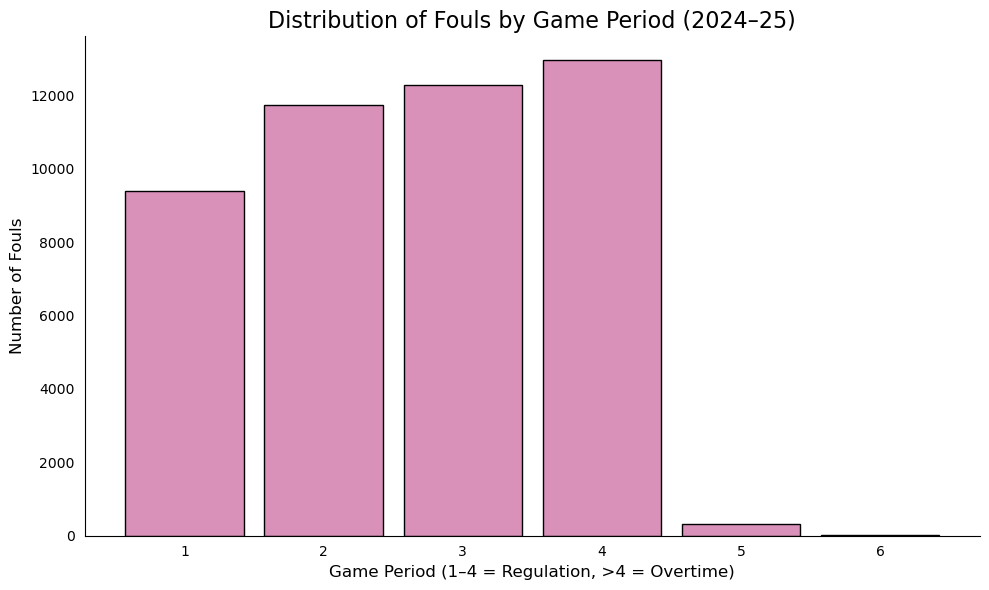

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(
    s24_25_r["PERIOD"],
    bins=range(1, s24_25_r["PERIOD"].max() + 2),
    edgecolor='black',
    color="#d991ba",
    rwidth=0.85,
    align='left'
)

ax.set_title("Distribution of Fouls by Game Period (2024–25)", fontsize=16)
ax.set_xlabel("Game Period (1–4 = Regulation, >4 = Overtime)", fontsize=12)
ax.set_ylabel("Number of Fouls", fontsize=12)
ax.set_xticks(range(1, s24_25_r["PERIOD"].max() + 1))
ax.tick_params(axis='both', which='major', labelsize=10)

sns.despine(ax=ax)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

The bar chart above shows the total number of fouls committed in each game period across the 2024–25 season. While this visualisation highlights that the 4th quarter sees the most fouls overall, and that the number of fouls continuously grows across quarters 1-4, it's important to interpret the overtime periods with caution.

**Why?**  
While every game has four quarters, not every game goes into overtime (5th period and beyond), so those periods naturally have fewer total fouls. Comparing raw foul counts between overtime and regulation periods doesn't account for how often those periods occur.

To make a fairer comparison, we will normalise the foul counts by the **number of games** that include each period This allows us to assess **foul rates per game**, rather than just total volume.


In [11]:
print(f"Recall that the number of games in the dataset is: {len(pd.unique(s24_25_r["GAME_ID"]))}")
print(f"The number of games that went to a single overtime: {len(pd.unique(s24_25_r[s24_25_r["PERIOD"]==5]["GAME_ID"]))}")
print(f"The number of games that went to a second overtime: {len(pd.unique(s24_25_r[s24_25_r["PERIOD"]==6]["GAME_ID"]))}")

Recall that the number of games in the dataset is: 1225
The number of games that went to a single overtime: 60
The number of games that went to a second overtime: 4


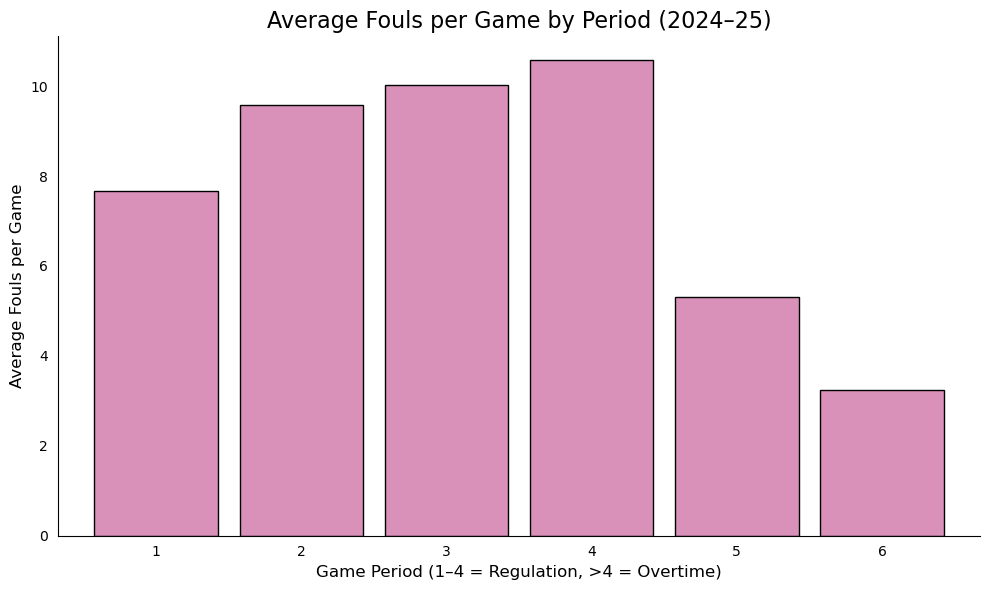

In [12]:
fouls_period = s24_25_r.groupby("PERIOD")["GAME_ID"].count()  # count the number of fouls committed in each period using non-unique game ids
no_games = s24_25_r.groupby("PERIOD")["GAME_ID"].nunique()  # number of games for each period

normalised_fouls = fouls_period/no_games

fig, ax = plt.subplots(figsize=(10, 6))
normalised_fouls.plot(kind='bar', ax=ax, color="#d991ba", edgecolor='black', width=0.85)

ax.set_title("Average Fouls per Game by Period (2024–25)", fontsize=16)
ax.set_xlabel("Game Period (1–4 = Regulation, >4 = Overtime)", fontsize=12)
ax.set_ylabel("Average Fouls per Game", fontsize=12)
ax.set_xticks(range(len(normalised_fouls)))
ax.set_xticklabels(normalised_fouls.index.astype(str), rotation=0)
ax.tick_params(axis='both', which='major', labelsize=10)

sns.despine(ax=ax)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()


However, recall that regulation quarters are **12 minutes** long; overtime periods are only **5 minutes**.
Fewer minutes → naturally fewer fouls. The current chart shows **average total fouls per game that had that period**, not **per-minute foul rates**.


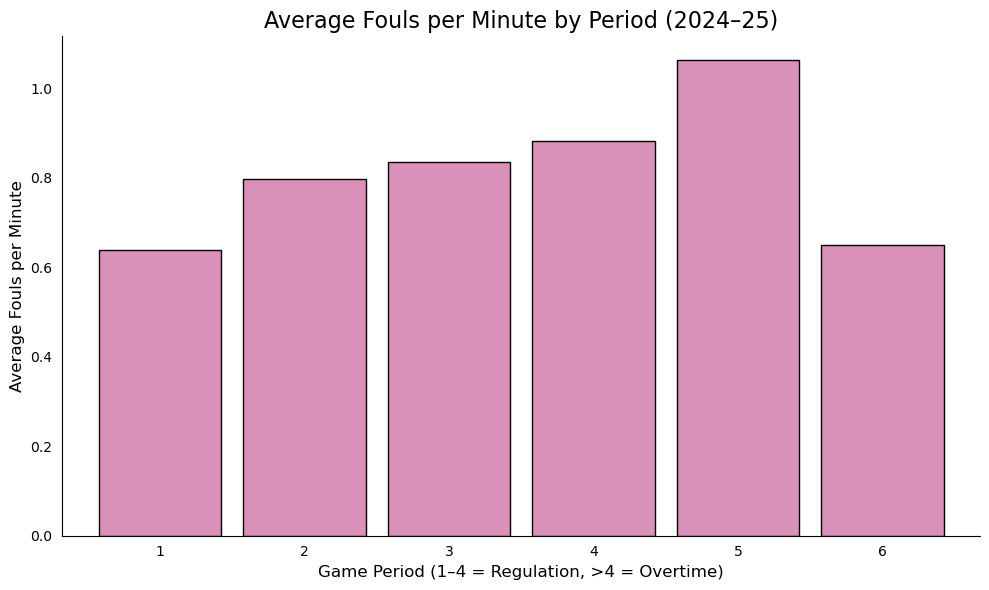

In [14]:
period_lengths = {1: 12, 2: 12, 3: 12, 4: 12, 5: 5, 6: 5}

fouls_min = normalised_fouls/no_games.index.map(period_lengths)

fig, ax = plt.subplots(figsize=(10, 6))
fouls_min.plot(kind='bar', ax=ax, color="#d991ba", edgecolor='black', width=0.85)

ax.set_title("Average Fouls per Minute by Period (2024–25)", fontsize=16)
ax.set_xlabel("Game Period (1–4 = Regulation, >4 = Overtime)", fontsize=12)
ax.set_ylabel("Average Fouls per Minute", fontsize=12)
ax.set_xticks(range(len(fouls_min)))
ax.set_xticklabels(fouls_min.index.astype(str), rotation=0)
ax.tick_params(axis='both', which='major', labelsize=10)

sns.despine(ax=ax)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()


**Conclusions**

1. **Foul intensity increases as the game progresses**
- Periods 1 through 4 (regulation) show a gradual rise in average fouls per minute.
- This suggests players commit more fouls in later quarters, potentially due to fatigue, tighter defense, or increased urgency.

2. **Overtime (Period 5) has the highest foul rate per minute**
- First overtime sees a noticeable spike, indicating that these high-stakes moments are especially foul-heavy.
- Fouling may be strategic (e.g., stopping the clock or forcing free throws), or due to high player stress and intensity.

3. **Second overtime (Period 6) drops back to below first-quarter levels**
- This may reflect a smaller sample size (only 4 double OT games), or players fouling out and rotations thinning out.

**Limitations**

- **Small sample size in OT periods**
  - Not every game goes to overtime, especially double OT, so the foul rates there might not be representative.
  - Outliers or a few extreme games could skew the average for periods 5 and 6.

- **Doesn’t differentiate foul types**
  - Shooting fouls, technicals, and intentional fouls are lumped together.
  - Strategic late-game fouling may not reflect actual defensive intensity.


#### Fouls by Game Period and Home/Away Team Status

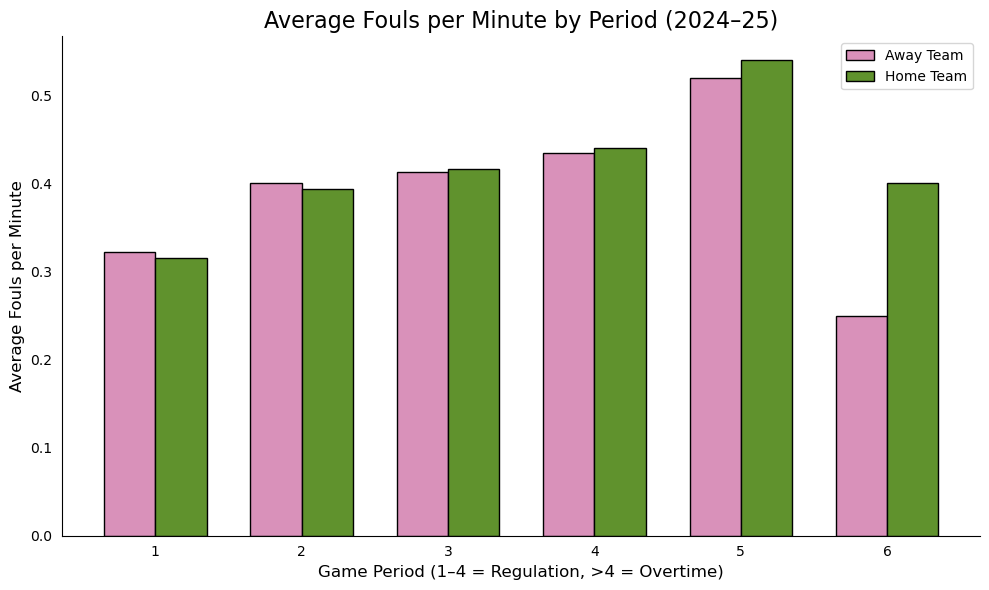

In [27]:
home_fouls = s24_25_r.groupby("PERIOD")["HOMEDESCRIPTION"].count()  # count the number of home fouls committed in each period using non-unique game ids
away_fouls = s24_25_r.groupby("PERIOD")["VISITORDESCRIPTION"].count()

norm_home_fouls = home_fouls/no_games/no_games.index.map(period_lengths)
norm_away_fouls = away_fouls/no_games/no_games.index.map(period_lengths)

x = np.arange(len(norm_home_fouls))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width/2, norm_away_fouls, width, label="Away Team", color="#d991ba", edgecolor='black')
ax.bar(x + width/2, norm_home_fouls, width, label="Home Team", color="#60922d", edgecolor='black')


ax.set_title("Average Fouls per Minute by Period (2024–25)", fontsize=16)
ax.set_xlabel("Game Period (1–4 = Regulation, >4 = Overtime)", fontsize=12)
ax.set_ylabel("Average Fouls per Minute", fontsize=12)
ax.set_xticks(range(len(fouls_min)))
ax.set_xticklabels(fouls_min.index.astype(str), rotation=0)
ax.tick_params(axis='both', which='major', labelsize=10)

ax.legend()

sns.despine(ax=ax)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

#### Key Observations

1. **Fouls increase as the game progresses — for both teams**
   - Both home and away teams tend to commit more fouls per minute as regulation progresses from Q1 to Q4.
   - This trend is most pronounced in the 5th period (overtime), where foul rates spike for both teams.

2. **Away teams consistently foul slightly more**
   - Away team has a marginally higher foul rate for quarters 1 and 2, while home team has a higher foul rate for quarters 3 and beyond. 
   - This does not align with the general idea that home teams benefit from officiating bias.
   - Home teams might foul more in overtime due to homecourt pressure.

3. **2nd overtime (Period 6) shows the home team fouling almost twice as much as the away team**
   - Not many games go to double overtime, so foul rates in Period 6 might not be reliable.

Is the difference in foul rate in quarter 5 statistically significant?

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["PCTIMESTRING"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time Left in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Remaining in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
sorted(s24_25["PCTIMESTRING"].dropna())[-10:]

In [ ]:
s24_25 = s24_25[s24_25["PCTIMESTRING"]<=720]
sorted(s24_25["PCTIMESTRING"].dropna())[-10:]

In [ ]:
sorted(s24_25["PCTIMESTRING"].dropna())[:10]

In [ ]:
print("The maximum score margin in the 2024-25 NBA season is", s24_25["SCOREMARGIN"].max())
print("The maximum score margin in the 2024-25 NBA season is", s24_25["SCOREMARGIN"].min())

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["PCTIMESTRING"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time Left in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Remaining in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

Note that:

- **NBA time counts down**, so **0 = end of quarter** and **720 = start**.
- So the left bar (700–720) reflects **fewer fouls at the start** of quarters.
- **Rightmost bar (0–60)** reflects **end-of-quarter crunch time**, where fouling (especially intentional) is more frequent.


In [ ]:
s24_25['SECONDSINQTR'] = 720 - s24_25["PCTIMESTRING"]
plt.figure(figsize=(10, 6))
sns.histplot(s24_25["SECONDSINQTR"], bins=12, kde=True, color="#8cae68", edgecolor='black')

plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

#### Key Observations

#### 1. Foul frequency increases as the quarter progresses
- There's a clear **upward trend** in fouls.
- This suggests **players foul more as the quarter progresses**, likely due to:
  - **Tighter defense**
  - **Frustration fouls**
  - **Bonus situations**
  - **Intentional fouling strategies**

#### 2. Sharp spike in the final minute
- The last bin has the **highest number of fouls**.
- This is classic **“crunch time” fouling**: teams intentionally foul to stop the clock, force the fouled player to shoot free throws, and potentially gain possession of the ball.

#### 3. Relatively steady foul rate mid-quarter
- From minutes 2–10, the foul rate stays fairly **consistent**.
- Suggests a stable pace of play without major disruption or strategic shifts.

### Implications / Insights
- Coaches and analysts might:
  - Emphasise **discipline early in quarters** to avoid bonus penalties late.
  - Design **clock-aware defensive plays** for the final minute.

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 1]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='First Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 2]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Second Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 2]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='Second Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 3]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Third Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 3]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='Third Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 4]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Fourth Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(s24_25[s24_25["PERIOD"]== 1]["SECONDSINQTR"], bins=12, kde=True, color="#fc8d62", edgecolor='black', label='First Quarter')
sns.histplot(s24_25[s24_25["PERIOD"]== 4]["SECONDSINQTR"], bins=12, kde=True, color="#8da0cb", edgecolor='black', label='Fourth Quarter')


plt.title("Distribution of Fouls by Time in Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter", fontsize=12)
plt.ylabel("Number of Fouls", fontsize=12)
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
quarters = [1, 2, 3, 4]
colors = ["#ebb9df", "#d991ba", "#8cae68", "#60992d"]

for i, period in enumerate(quarters):
    ax = axes[i // 2, i % 2]
    sns.histplot(
        s24_25[s24_25["PERIOD"] == period]["SECONDSINQTR"],
        bins=12, kde=True, color=colors[i], edgecolor="black", ax=ax
    )
    ax.set_title(f"Q{period}")
    ax.set_xlabel("Seconds Elapsed in Quarter")
    ax.set_ylabel("Number of Fouls")
    sns.despine(ax=ax)

plt.suptitle("Foul Timing Distribution by Quarter (2024–25)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
        s24_25[s24_25["PERIOD"] == 5]["SECONDSINQTR"],
        bins=12, kde=True, color="#d991ba", edgecolor="black"
    )
plt.title("Foul Timing Distribution in the Fifth Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Number of Fouls")
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
        s24_25[s24_25["PERIOD"] == 6]["SECONDSINQTR"],
        bins=12, kde=True, color="#60992d", edgecolor="black"
    )
plt.title("Foul Timing Distribution in the Sixth Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Number of Fouls")
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
q4_q5 = s24_25[s24_25["PERIOD"].isin([4, 5])].copy()

q4_last_min = q4_q5[(q4_q5["PERIOD"] == 4) & (q4_q5["SECONDSINQTR"] >= 660)]
q4_rest = q4_q5[(q4_q5["PERIOD"] == 4) & (q4_q5["SECONDSINQTR"] < 660)]

q5_last_min = q4_q5[(q4_q5["PERIOD"] == 5) & (q4_q5["SECONDSINQTR"] >= 660)]
q5_rest = q4_q5[(q4_q5["PERIOD"] == 5) & (q4_q5["SECONDSINQTR"] < 660)]

# number of games across the season across the league 
no_games = len(pd.unique(s24_25["GAME_ID"]))
# number of games that went into 5th quarter
no_firstover = len(pd.unique(s24_25[s24_25["PERIOD"]==5]["GAME_ID"]))
print(no_games, no_firstover)

In [ ]:
q4_last_min_fouls = len(q4_last_min)  # total fouls in final min of Q4 across all games
q4_rest_fouls = len(q4_rest)  # total fouls in rest of Q4

q5_last_min_fouls = len(q5_last_min)  # total fouls in final min of OT1
q5_rest_fouls = len(q5_rest)  # total fouls in rest of OT1

q4_last_min_total_minutes = no_games * 1
q4_rest_total_minutes = no_games * 11

q5_last_min_total_minutes = no_firstover * 1
q5_rest_total_minutes = no_firstover * 11

q1_fouls = len(s24_25[s24_25["PERIOD"]==1])
q2_fouls = len(s24_25[s24_25["PERIOD"]==2])
q3_fouls = len(s24_25[s24_25["PERIOD"]==3])
q4_fouls = len(s24_25[s24_25["PERIOD"]==4])
q5_fouls = len(s24_25[s24_25["PERIOD"]==5])

# fouls per minute per game
rates_per_min_per_game = {
    "Q1": q1_fouls/(no_games*12),
    "Q2": q2_fouls/(no_games*12),
    "Q3": q3_fouls/(no_games*12),
    "Q4": q4_fouls/(no_games*12),
    "Q5": q5_fouls/(no_firstover*12),
    "Q4 Last Min": q4_last_min_fouls / q4_last_min_total_minutes,
    "Q4 Rest": q4_rest_fouls / q4_rest_total_minutes,
    "Q5 Last Min": q5_last_min_fouls / q5_last_min_total_minutes,
    "Q5 Rest": q5_rest_fouls / q5_rest_total_minutes
}

# plot
plt.figure(figsize=(10, 6))
plt.bar(rates_per_min_per_game.keys(), rates_per_min_per_game.values(),
        color=["#ff006e", "#ff006e", "#ff006e", "#ff006e", "#ff006e", "#60992d", "#8cae68", "#d991ba", "#ebb9df"],
        edgecolor='black')
plt.title("Foul Rate per Minute per Game: Q4 and OT1")
plt.ylabel("Fouls per Minute per Game")
plt.tight_layout()
sns.despine()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
colors = ["#8338ec", "#ff006e", "#fb5607", "#ffbe0b"]

for i, period in enumerate(quarters):
    sns.kdeplot(
        data=s24_25[s24_25["PERIOD"] == period],
        x="SECONDSINQTR",
        label=f"Q{period}",
        bw_adjust=1,
        fill=False,
        color=colors[i],
        linewidth=2
    )

plt.title("KDE of Foul Timing by Quarter (2024–25)", fontsize=16)
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Estimated Density")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
s24_25["ABSMARGIN"] = s24_25["SCOREMARGIN"].abs()

plt.figure(figsize=(10, 6))

sns.histplot(s24_25["ABSMARGIN"], bins=30, color="#60992d")
plt.title("Distribution of Fouls by Score Margin")
plt.xlabel("Absolute Score Margin")
plt.ylabel("Number of Fouls")
sns.despine()
plt.show()

The histogram shows that **fewer fouls occur when the absolute score margin is large**, but it **also reflects the fact that large score margins are rarer**.

In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25, x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")

sns.despine()
plt.show()


### Close Games (green line)

- Higher foul density **early** in the quarter
- Relatively steady through the middle
- **Peaks towards the end**.

### Non-Close Games (pink line)

- Slightly **lower foul density early**
- Peaks more **heavily toward the end** of the quarter
- Suggests **more late-quarter fouling** in games that aren’t close — possibly frustration fouls, garbage time, or bench players

### What This Could Mean

- In **close games**, teams may foul earlier to be aggressive or disrupt momentum, but play more carefully late to avoid giving away points.
- In **non-close games**, fouls may accumulate at the end when players are less restrained (e.g., intentional fouls, substitutions, fatigue).


In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25[s24_25["PERIOD"]==1], x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games in the First Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")
sns.despine()
plt.show()

In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25[s24_25["PERIOD"]==2], x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games in the Second Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")
sns.despine()
plt.show()

In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25[s24_25["PERIOD"]==3], x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games in the Third Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")
sns.despine()
plt.show()

In [ ]:
s24_25["ISCLOSE_MARGIN"] = s24_25["ABSMARGIN"].apply(lambda x: "Close" if x <= 5 else "Non-Close")  # creates a boolean column that checks whether the score margin is close or not
s24_25["ISCLOSE_MARGIN"].value_counts(normalize=True)  # percentage of fouls that occurred in close vs non-close moments

custom_palette = {"Close": "#60992d", "Non-Close": "#d991ba"}
plt.figure(figsize=(10, 6))
sns.kdeplot(data=s24_25[s24_25["PERIOD"]==4], x="SECONDSINQTR", hue="ISCLOSE_MARGIN", palette=custom_palette, common_norm=False)
plt.title("Timing of Fouls: Close vs Non-Close Games in the Fourth Quarter")
plt.xlabel("Seconds Elapsed in Quarter")
plt.ylabel("Density")
sns.despine()
plt.show()


In [ ]:
# i want to plot timing of fouls across the entire game
